In [1]:
#import all libreries which is required
import os
import pdfplumber
import docx
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Function to extract text from PDF file
def extract_text_from_pdf(pdf_file):
    with pdfplumber.open(pdf_file) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()
    return text.replace("\n", "")



In [3]:
# Function to extract text from DOCX file
def extract_text_from_docx(docx_file):
    text = ""
    doc = docx.Document(docx_file)
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text


In [4]:
# Function to extract text from PDF or DOCX file
def extract_text_from_file(file_path):
    if file_path.endswith(".pdf"):
        return extract_text_from_pdf(file_path)
    elif file_path.endswith(".docx"):
        return extract_text_from_docx(file_path)
    else:
        raise ValueError("Unsupported file format")

In [5]:
# Function to extract skills from text
def extract_skills(text):
    # Define a list of Required skills
    Required_skills = ['python', 'machine learning', 'Data Analysis', 'problem solving', 'Analytical Skills','NLP','Neural Network']

    # Use regular expressions to find skills
    skills_found = []
    for skill in Required_skills:
        if re.search(r'\b' + re.escape(skill) + r'\b', text, re.IGNORECASE):
            skills_found.append(skill)
    
    return skills_found

In [6]:
# Function to extract certifications from text
def extract_certifications(text):
    # Define a list of Required certifications
    Required_certifications = ['Python','Machine learning','NLP','Data Scientist', 'Data Analysis']

    # Use regular expressions to find certifications
    certifications_found = []
    for cert in Required_certifications:
        if re.search(r'\b' + re.escape(cert) + r'\b', text, re.IGNORECASE):
            certifications_found.append(cert)
    return certifications_found


In [7]:
# Function to extract education from text
def extract_education_details(education_info):
    # Split the education information into lines
    lines = education_info.splitlines()

    # Concatenate all lines into a single line
    education_details = ' '.join(lines)
    
    return education_details.strip()
def extract_education(text):
    # Define a pattern to capture education information
    education_pattern = r"(?i)(education|degree|university|college|institution)\s*:?([\s\S]*?)(?=(experience|certification|skills|summary|summary of qualifications|$))"
    education_match = re.search(education_pattern, text)
    
    # Initialize variable to store education details
    formatted_education = []

    # Extract education information if found
    if education_match:
        education_info = education_match.group(2)
        education_details = extract_education_details(education_info)
        formatted_education.append("EDUCATION:\n" + education_details)

    return formatted_education


In [8]:
def extract_experience(text):
    # Define a list of key phrases or job titles
    key_phrases = ['data scientist', 'data analyst', 'machine learning engineer', 'business analyst']

    # Split the text into sections based on common section headers
    sections = re.split(r'\b(Education|Experience|Skills|Certifications)\b', text, flags=re.IGNORECASE)

    # Find the section labeled as "Experience" and extract relevant phrases
    experience_section = None
    for i, section_name in enumerate(sections):
        if section_name.strip().lower() == "experience":
            experience_section = sections[i + 1].strip()
            break

    # Extract only the main keywords from the experience section
    extracted_keywords = []
    if experience_section:
        for phrase in key_phrases:
            if phrase.lower() in experience_section.lower():
                extracted_keywords.append(phrase)

    return ["EXPERIENCE:\n" + ", ".join(extracted_keywords[:1])] if extracted_keywords else []


In [9]:
# Path to job description PDF
job_description_file = r"C:\Users\ISHA\Downloads\file\FabHotels - Internship (1) - Prashanth Balaji.pdf"
job_description_text = extract_text_from_pdf(job_description_file)

# Directory containing resume files
resume_directory = r"C:\Users\ISHA\Downloads\resumes"

# Dictionary to store match percentages for each resume #this directory contains 6 resumes
resume_match_percentages = {}

# Iterate through all resumes in the directory
for resume_file in os.listdir(resume_directory):
    # Construct the full path to the resume file
    resume_file_path = os.path.join(resume_directory, resume_file)
    
    # Extract text from the resume file
    resume_text = extract_text_from_file(resume_file_path)
    
    # Prepare text for comparison
    match_texts = [resume_text, job_description_text]

    # Vectorize the text
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(match_texts)

    # Calculate cosine similarity
    similarity = cosine_similarity(count_matrix)[0][1]
    match_percentage = round(similarity * 100, 2)

    # Extract skills, certifications, education, and experience from the resume text
    skills = extract_skills(resume_text)
    certifications = extract_certifications(resume_text)
    education = extract_education(resume_text)
    experience = extract_experience(resume_text)

    # Store match percentage and extracted information in dictionary
    resume_match_percentages[resume_file] = {
        "match_percentage": match_percentage,
        "skills": skills,
        "certifications": certifications,
        "education": education,
        "experience": experience
    }

# Rank resumes based on match percentage
ranked_resumes = sorted(resume_match_percentages.items(), key=lambda x: x[1]['match_percentage'], reverse=True)

# Print match percentages and ranks for all resumes, along with extracted information
for rank, (resume, data) in enumerate(ranked_resumes, start=1):
    print(f"Rank {rank}: {resume} - Match Percentage: {data['match_percentage']}%")
    print("Skills:", data['skills'])
    print("Certifications:", data['certifications'])
    print("Education:")
    for edu in data['education']:
        print(edu)
    print("Experience:")
    for exp in data['experience']:
        print(exp)
    print()


Rank 1: B.TECH_AnshikaGupta.pdf - Match Percentage: 57.45%
Skills: ['python', 'machine learning']
Certifications: ['Python', 'Machine learning']
Education:
EDUCATION:
Undergraduate Course (2020-2024)Sushant University, India - Btech CSE, specialization in AI & MLSGPA: 9.18
Experience:

Rank 2: senior-data-scientist-resume-example.pdf - Match Percentage: 55.65%
Skills: ['python']
Certifications: ['Python']
Education:
EDUCATION:
University of Pittsburgh -Master's , MathematicsSeptember 2012 - April 2014 Pittsburgh, PAUniversity of Pittsburgh-Bachelor's, Mathematics and EconomicsSeptember 2008 - April 2012 Pittsburgh, PA
Experience:
EXPERIENCE:
data scientist

Rank 3: B.TECH_Oorja.pdf - Match Percentage: 54.82%
Skills: ['python', 'machine learning']
Certifications: ['Python', 'Machine learning']
Education:
EDUCATION:
Bachelor of Computer Science (Specialization in Cyber Security) 2020 -Present, Sushant University, Gurugram, IndiaSenior Secondary (PCM with Python Programming) 2018 - 2020, 

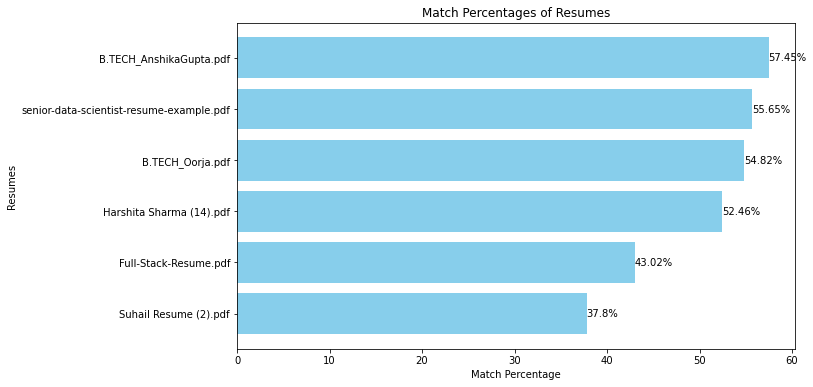

In [10]:
import matplotlib.pyplot as plt

# Extracting resume names and match percentages for plotting
resume_names = [resume[0] for resume in ranked_resumes]
match_percentages = [resume[1]["match_percentage"] for resume in ranked_resumes]

# Plotting the match percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(resume_names, match_percentages, color='skyblue')
plt.xlabel('Match Percentage')
plt.ylabel('Resumes')
plt.title('Match Percentages of Resumes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest match at the top

# Adding percentages on top of the bars
for bar, percentage in zip(bars, match_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


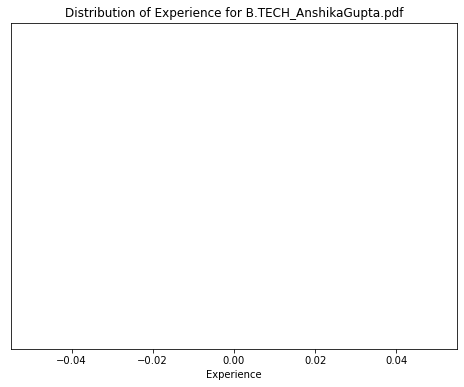

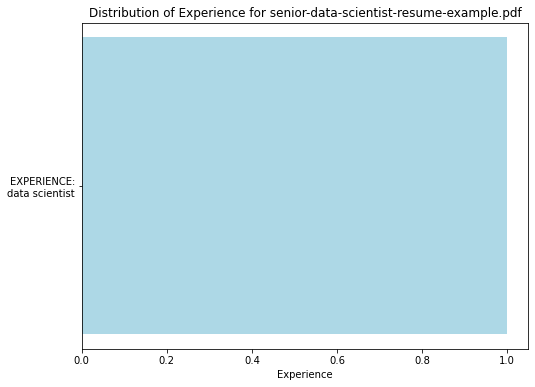

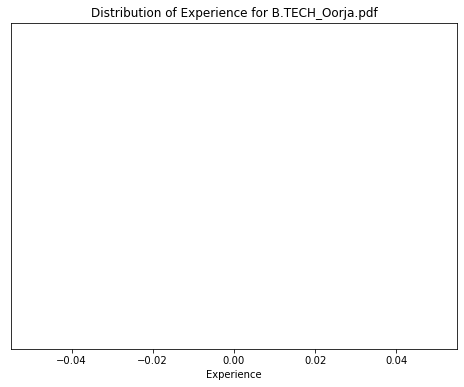

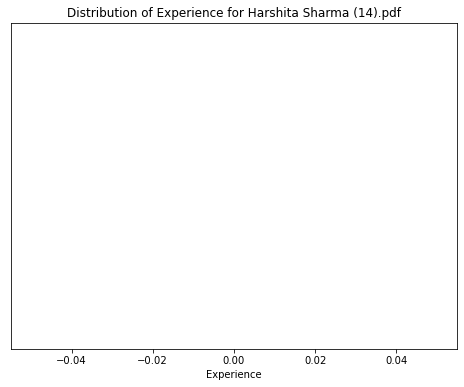

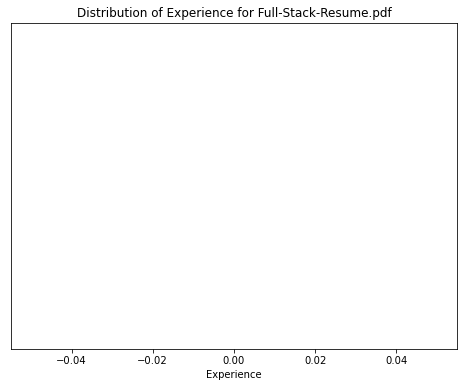

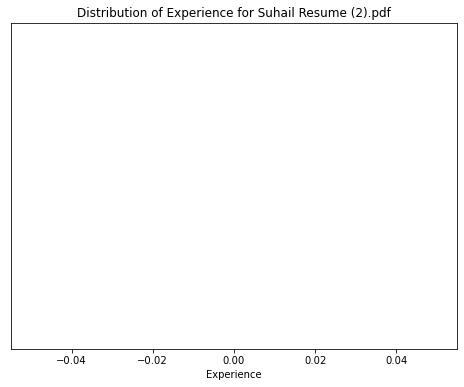

In [78]:
# Extracting resume names and corresponding information for plotting
resume_data = {
    resume[0]: {
        "experience": resume[1]["experience"]
    }
    for resume in ranked_resumes
}

# Plotting the distribution of experience for each resume
for resume_name, data in resume_data.items():
    plt.figure(figsize=(8, 6))
    experience = data["experience"]
    y_positions = range(len(experience))
    plt.barh(y_positions, [1] * len(experience), color='lightblue')  # Plotting bars for each experience entry
    plt.yticks(y_positions, experience)  # Setting y-ticks to display the experience
    plt.xlabel('Experience')
    plt.title(f'Distribution of Experience for {resume_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most recent experience at the top
    plt.show()
